# infection_probability.ipynb

In [1]:
import pandas as pd
import plotly.express as px

In [2]:
# Get data from beetles table

df_beetles = pd.read_csv('../db_tables/beetles.csv')
df_beetles = df_beetles[['sn', 'treatment', 'dose_mg', 'date_dosed']]
# df_beetles

In [3]:
# Get data from shipment1 table

df_shipment1 = pd.read_excel('../sample_shipment/tissue_samples_shipment_1.xlsx')
df_shipment1 = df_shipment1[['batch','tube_number','specimen_id']]
# df_shipment1

In [4]:
# Get data from pcr results table

df_pcr = pd.read_excel('../pcr_results/Aubrey update 8Mar23.xlsx')
df_pcr = df_pcr[['Virus', 'AgR batch label', 'Aubrey tube number']]
df_pcr = df_pcr.dropna(axis=0)
df_pcr['Aubrey tube number'] = df_pcr['Aubrey tube number'].astype(int)
# df_pcr

In [5]:
# merge dataframes

df_merged = df_pcr.merge(right=df_shipment1, how='left', left_on=['AgR batch label','Aubrey tube number'], right_on=['batch', 'tube_number']) 
df_merged = df_merged.merge(right=df_beetles, how='left', left_on='specimen_id', right_on='sn', suffixes=(None,None))
df_merged = df_merged[['treatment','dose_mg','Virus']]
df_merged.rename({'Virus': 'OrNV_detected'}, axis=1, inplace=True)
df_merged['dose_IU'] = df_merged['dose_mg'] * 500
df_merged

,treatment,dose_mg,OrNV_detected,dose_IU
0,CONTROL,173.0,no,86500.0
1,CONTROL,202.0,no,101000.0
2,DUG42,0.0,no,0.0
3,X2B,107.0,no,53500.0
4,X2B,80.0,no,40000.0
...,...,...,...,...
166,NaN,NaN,no,NaN
167,NaN,NaN,no,NaN
168,NaN,NaN,no,NaN
169,NaN,NaN,no,NaN


OrNV_detected=10   OrNV_not_detected=9
    treatment  dose_mg  OrNV_detected   dose_IU  one    p_OrNV
84       V23B     30.0              0   15000.0    1  0.000000
38       V23B     35.0              0   17500.0    1  0.000000
113      V23B     67.0              1   33500.0    1  0.333333
48       V23B     68.0              0   34000.0    1  0.250000
17       V23B     71.0              0   35500.0    1  0.200000
89       V23B     78.0              0   39000.0    1  0.166667
52       V23B     93.0              0   46500.0    1  0.142857
112      V23B     96.0              0   48000.0    1  0.125000
76       V23B    101.0              0   50500.0    1  0.111111
62       V23B    108.0              1   54000.0    1  0.200000
72       V23B    126.0              1   63000.0    1  0.272727
58       V23B    129.0              1   64500.0    1  0.333333
34       V23B    133.0              1   66500.0    1  0.384615
39       V23B    136.0              1   68000.0    1  0.428571
93       V23B   

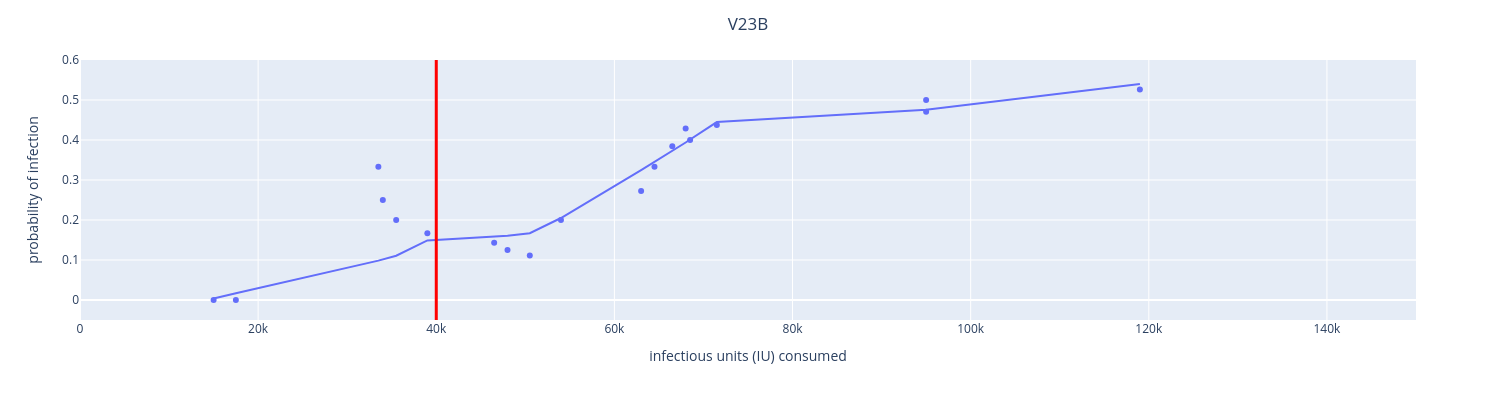

OrNV_detected=9   OrNV_not_detected=15
    treatment  dose_mg  OrNV_detected   dose_IU  one    p_OrNV
63      DUG42      3.0              0    1500.0    1  0.000000
28      DUG42      3.0              0    1500.0    1  0.000000
51      DUG42      9.0              0    4500.0    1  0.000000
27      DUG42      9.0              0    4500.0    1  0.000000
10      DUG42     12.0              0    6000.0    1  0.000000
16      DUG42     17.0              0    8500.0    1  0.000000
102     DUG42     33.0              0   16500.0    1  0.000000
46      DUG42     39.0              0   19500.0    1  0.000000
107     DUG42     40.0              0   20000.0    1  0.000000
116     DUG42     72.0              0   36000.0    1  0.000000
73      DUG42     73.0              1   36500.0    1  0.090909
50      DUG42     94.0              1   47000.0    1  0.166667
110     DUG42     95.0              0   47500.0    1  0.153846
53      DUG42    112.0              0   56000.0    1  0.142857
22      DUG42   

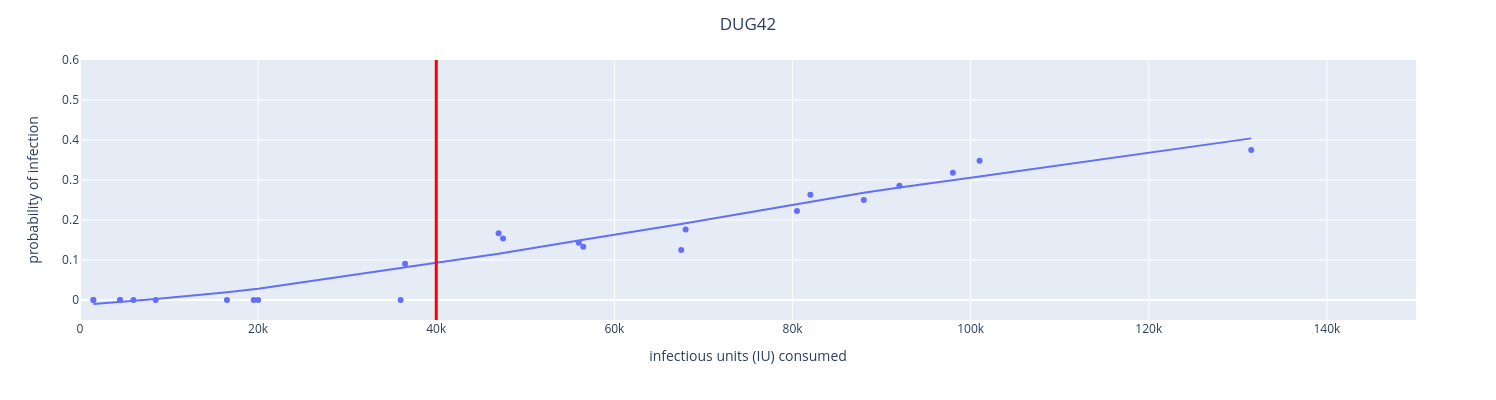

OrNV_detected=4   OrNV_not_detected=12
    treatment  dose_mg  OrNV_detected   dose_IU  one    p_OrNV
70        PNG     23.0              0   11500.0    1  0.000000
80        PNG     34.0              0   17000.0    1  0.000000
92        PNG     76.0              0   38000.0    1  0.000000
44        PNG     77.0              0   38500.0    1  0.000000
15        PNG     81.0              0   40500.0    1  0.000000
86        PNG     81.0              0   40500.0    1  0.000000
109       PNG     83.0              1   41500.0    1  0.142857
12        PNG     99.0              0   49500.0    1  0.125000
55        PNG    104.0              0   52000.0    1  0.111111
32        PNG    110.0              1   55000.0    1  0.200000
87        PNG    112.0              0   56000.0    1  0.181818
77        PNG    125.0              0   62500.0    1  0.166667
47        PNG    143.0              0   71500.0    1  0.153846
67        PNG    175.0              1   87500.0    1  0.214286
106       PNG   

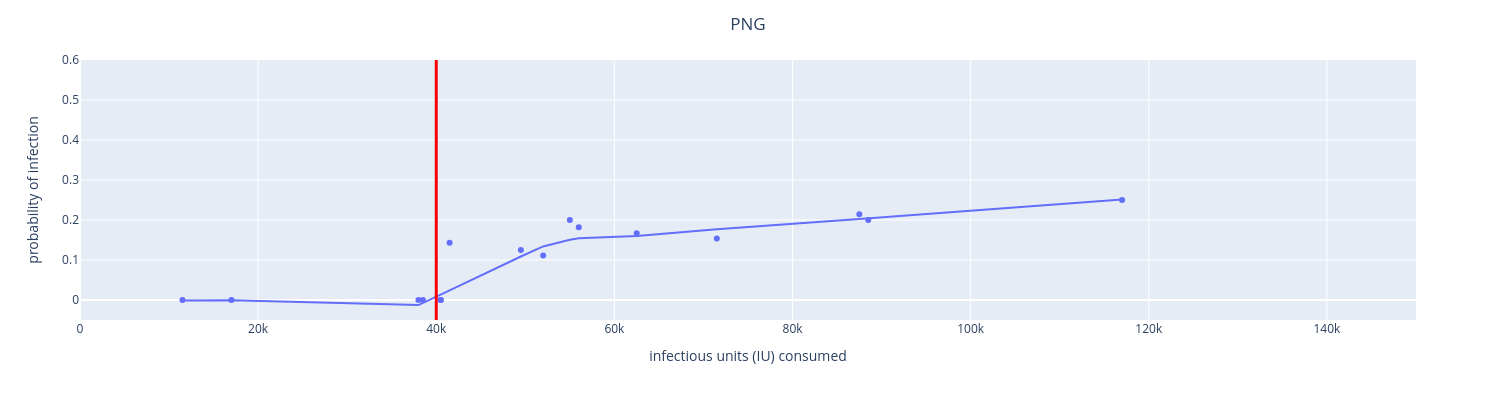

OrNV_detected=4   OrNV_not_detected=12
    treatment  dose_mg  OrNV_detected  dose_IU  one    p_OrNV
54        X2B     25.0              0  12500.0    1  0.000000
69        X2B     25.0              0  12500.0    1  0.000000
71        X2B     52.0              0  26000.0    1  0.000000
74        X2B     63.0              0  31500.0    1  0.000000
95        X2B     68.0              0  34000.0    1  0.000000
90        X2B     69.0              0  34500.0    1  0.000000
79        X2B     78.0              0  39000.0    1  0.000000
4         X2B     80.0              0  40000.0    1  0.000000
33        X2B     81.0              0  40500.0    1  0.000000
37        X2B     95.0              1  47500.0    1  0.100000
3         X2B    107.0              0  53500.0    1  0.090909
111       X2B    108.0              1  54000.0    1  0.166667
108       X2B    112.0              0  56000.0    1  0.153846
40        X2B    121.0              0  60500.0    1  0.142857
78        X2B    170.0         

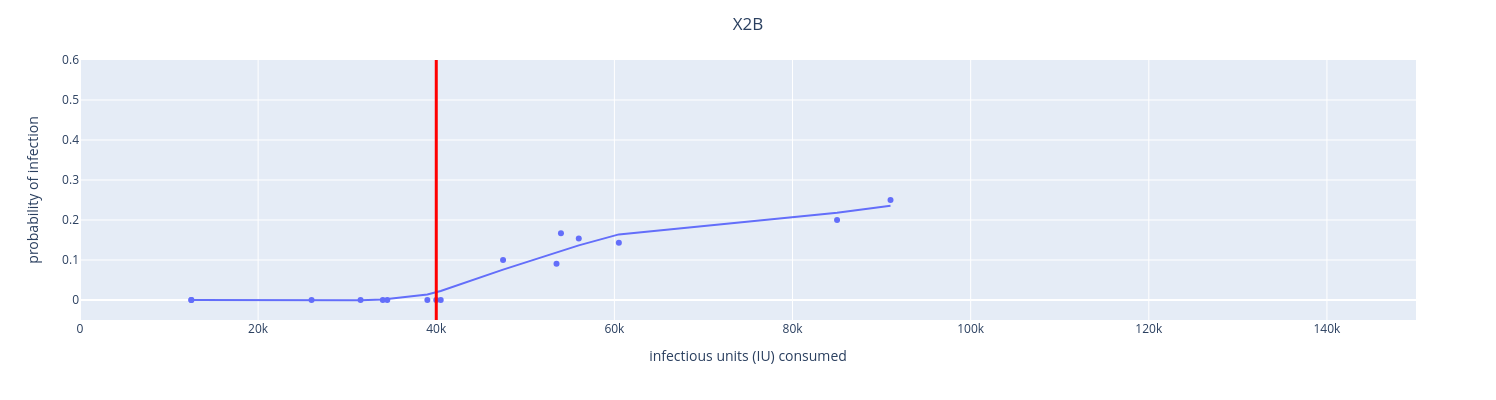

In [8]:
def process_treatment(treatment):
    """ treatment is in ['DUG42', 'PNG', 'X2B', 'V23B'] """

    df = df_merged.query(f'treatment == "{treatment}" & dose_IU > 0 & OrNV_detected != "failed"').sort_values(by='dose_mg')
    df.OrNV_detected = df.OrNV_detected.map({'yes': 1, 'no': 0, 'faint': 1}).astype(int)
    df['one'] = 1
    df['p_OrNV'] = df.OrNV_detected.cumsum() / df.one.cumsum()
    OrNV_detected = df.OrNV_detected.sum()
    OrNV_not_detected = len(df) - OrNV_detected
    print(f'{OrNV_detected=}   {OrNV_not_detected=}')
    print(df)

    fig = px.scatter(df, x='dose_IU', y='p_OrNV', width=400, height=400, trendline="lowess", labels={'dose_IU': 'infectious units (IU) consumed', 'p_OrNV': 'probability of infection'})
    fig.update_layout(yaxis_range=[-0.05,.6], xaxis_range=[0,150000], title_text=treatment, title_x=0.5)
    fig.add_vline(x=40000, line_width=3, line_color="red")
    fig.write_image(f'../images/{treatment}_infection_probability.png')
    fig.show()
    
for treatment in ['V23B', 'DUG42', 'PNG', 'X2B']:
    process_treatment(treatment)